In [2]:
#call libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv("HDFCBANK.csv")

In [4]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,HDFCBANK,EQ,157.40,166.00,170.00,166.00,170.00,170.00,169.52,33259,5.638122e+11,NaN,NaN,NaN
1,2000-01-04,HDFCBANK,EQ,170.00,182.00,183.45,171.00,174.00,173.80,174.99,168710,2.952261e+12,NaN,NaN,NaN
2,2000-01-05,HDFCBANK,EQ,173.80,170.00,173.90,165.00,168.00,166.95,169.20,159820,2.704094e+12,NaN,NaN,NaN
3,2000-01-06,HDFCBANK,EQ,166.95,168.00,170.00,165.30,168.95,168.30,168.44,85026,1.432166e+12,NaN,NaN,NaN
4,2000-01-07,HDFCBANK,EQ,168.30,162.15,171.00,162.15,170.75,168.35,166.79,85144,1.420158e+12,NaN,NaN,NaN


In [5]:
df.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
5199,2020-11-23,HDFCBANK,EQ,1403.65,1415.0,1423.65,1375.35,1397.3,1394.60,1398.55,12623318,1.765438e+15,297107.0,5172382.0,0.4097
5200,2020-11-24,HDFCBANK,EQ,1394.60,1408.0,1445.00,1402.05,1444.0,1438.20,1430.00,20077200,2.871049e+15,341801.0,10998578.0,0.5478
5201,2020-11-25,HDFCBANK,EQ,1438.20,1451.3,1464.40,1397.00,1406.5,1402.80,1431.81,12076301,1.729097e+15,310836.0,3864872.0,0.3200
5202,2020-11-26,HDFCBANK,EQ,1402.80,1415.0,1432.00,1387.00,1431.9,1426.65,1410.64,13971563,1.970889e+15,269679.0,3873907.0,0.2773
5203,2020-11-27,HDFCBANK,EQ,1426.65,1431.8,1446.00,1415.55,1438.0,1440.85,1429.86,8997290,1.286483e+15,174132.0,2947164.0,0.3276


In [6]:
df.shape

(5204, 15)

In [7]:
stock=df['Close']

In [8]:
stock.head()

0    170.00
1    173.80
2    166.95
3    168.30
4    168.35
Name: Close, dtype: float64

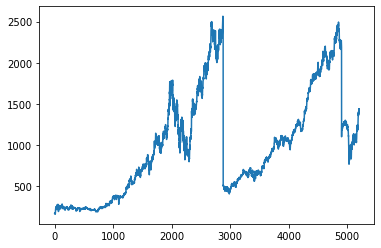

In [10]:
plt.plot(stock)
plt.show()

In [11]:
#Minmax Scaling
def minmax(X):
  return (X - X.min())/ (X.max() - X.min())

stock_scaled = minmax(stock)

In [12]:
train = stock_scaled.head(3642)
test = stock_scaled.tail(1562)

In [13]:
# Prepare data
def prepare_data(data, time_step):
    X, y =[],[]
    for i in range(len(data)):
        # find the end of this pattern
        end_ix = i + time_step
        # check if we are beyond the sequence
        if end_ix > len(data)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = data[i:end_ix], data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [14]:
time_step = 100
X_train, y_train = prepare_data(train.values,time_step)
X_test, y_test = prepare_data(test.values, time_step)

In [15]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [16]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [17]:
model.fit(X_train,y_train,epochs=100,batch_size=100)

Epoch 1/100
36/36 [==============================] - 21s 373ms/step - loss: 0.0381
Epoch 2/100
36/36 [==============================] - 11s 318ms/step - loss: 0.0018
Epoch 3/100
36/36 [==============================] - 11s 316ms/step - loss: 0.0020
Epoch 4/100
36/36 [==============================] - 12s 322ms/step - loss: 0.0013
Epoch 5/100
36/36 [==============================] - 12s 332ms/step - loss: 0.0016
Epoch 6/100
36/36 [==============================] - 12s 337ms/step - loss: 0.0013
Epoch 7/100
36/36 [==============================] - 12s 338ms/step - loss: 0.0016
Epoch 8/100
36/36 [==============================] - 12s 334ms/step - loss: 0.0018
Epoch 9/100
36/36 [==============================] - 12s 347ms/step - loss: 6.6760e-04
Epoch 10/100
36/36 [==============================] - 12s 337ms/step - loss: 0.0016
Epoch 11/100
36/36 [==============================] - 12s 327ms/step - loss: 8.5522e-04
Epoch 12/100
36/36 [==============================] - 12s 332ms/step - loss: 

36/36 [==============================] - 11s 307ms/step - loss: 3.7048e-04
Epoch 95/100
36/36 [==============================] - 11s 307ms/step - loss: 3.4520e-04
Epoch 96/100
36/36 [==============================] - 11s 292ms/step - loss: 9.4368e-04
Epoch 97/100
36/36 [==============================] - 11s 294ms/step - loss: 6.3634e-04
Epoch 98/100
36/36 [==============================] - 11s 304ms/step - loss: 2.0997e-04
Epoch 99/100
36/36 [==============================] - 11s 296ms/step - loss: 2.4337e-04
Epoch 100/100
36/36 [==============================] - 11s 291ms/step - loss: 1.8458e-04


In [18]:
y_pred = model.predict(X_test)

In [19]:
# reverse scaling
def minmax_reverse(X_norm,X):
    return (X_norm * (X.max() - X.min())) + X.min()

In [20]:
y_pred_actual = minmax_reverse(y_pred,stock)
y_test_actual = minmax_reverse(y_test,stock)

In [21]:
np.sqrt(mean_squared_error(y_test_actual,y_pred_actual))

36.07996874912136

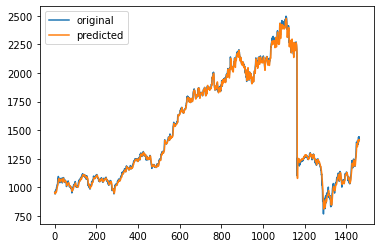

In [22]:
# plot original and predicted values
plt.figure()
plt.plot(y_test_actual,label="original")
plt.plot(y_pred_actual,label="predicted")
plt.legend()
plt.show()

In [23]:
n = 200
predicted_values = []
last_100 = X_test[-1].reshape(1,100,1)

while n>=1:
  predicted = model.predict(last_100)
  predicted_values.append(predicted[0][0])
  last_100 = np.append(last_100,predicted)[1:].reshape(1,100,1)
  n-=1

In [24]:
forecast = minmax_reverse(np.array(predicted_values),stock)

In [25]:
forecast

array([1414.0277, 1410.067 , 1404.4777, 1399.5066, 1395.7805, 1393.3397,
       1391.897 , 1391.0219, 1390.3049, 1389.4586, 1388.3512, 1386.987 ,
       1385.4554, 1383.8737, 1382.3383, 1380.9015, 1379.5643, 1378.2886,
       1377.0175, 1375.6964, 1374.2883, 1372.7823, 1371.1926, 1369.5536,
       1367.9099, 1366.3081, 1364.7894, 1363.3849, 1362.1156, 1360.9916,
       1360.016 , 1359.1868, 1358.4984, 1357.9442, 1357.5155, 1357.2028,
       1356.9951, 1356.8798, 1356.8424, 1356.8677, 1356.9401, 1357.0436,
       1357.164 , 1357.2878, 1357.4044, 1357.5045, 1357.5817, 1357.6312,
       1357.6495, 1357.636 , 1357.5896, 1357.5111, 1357.402 , 1357.2644,
       1357.1   , 1356.9114, 1356.7007, 1356.4703, 1356.2225, 1355.9587,
       1355.6804, 1355.3894, 1355.086 , 1354.7717, 1354.4458, 1354.1096,
       1353.763 , 1353.4061, 1353.0394, 1352.6633, 1352.2778, 1351.884 ,
       1351.4816, 1351.0719, 1350.6553, 1350.2334, 1349.8066, 1349.3763,
       1348.9432, 1348.5085, 1348.0735, 1347.6387, 

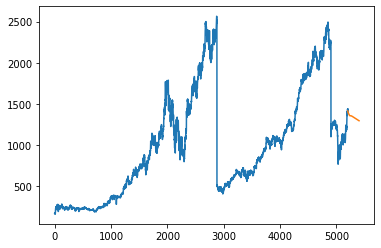

In [26]:
plt.figure()
plt.plot(stock.index,stock)
plt.plot(np.arange(5204,5404),forecast)
plt.show()